In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from src.functions import *

In [2]:
# Train Data
x_train = np.loadtxt('./data/imdb/imdb_train_text.txt',delimiter='\n',dtype='str',comments=None)
y_train = np.loadtxt('./data/imdb/imdb_train_labels.txt',delimiter='\n',dtype=np.int64)

# Test Data
x_test = np.loadtxt('./data/imdb/imdb_test_text.txt',delimiter='\n',dtype='str',comments=None)
y_test = np.loadtxt('./data/imdb/imdb_test_labels.txt',delimiter='\n',dtype=np.int64)

In [3]:
# Create Dictionary
words = []
for doc in x_train:
    words += set(tokenize(doc))
words = set(words)
diction = dict(zip(list(words),np.arange(len(words))))
save(diction,"./data/tmp/diction.pickle")
# diction = load("./data/tmp/diction.pickle")
print("Dictionary created")

Dictionary created


In [4]:
# Calculate Word Counts per Class
labels, label_counts = np.unique(y_train,return_counts=True)
class_label_map = dict(zip(labels,np.arange(labels.shape[0])))
word_counts_per_class = np.zeros((labels.shape[0],len(diction.keys())),dtype=np.int64)
for idx, doc in enumerate(x_train):
    doc_words = tokenize(doc)
    unique_doc_words, word_count = np.unique(doc_words,return_counts=True)
    for idy, w in enumerate(unique_doc_words):
        word_counts_per_class[class_label_map[y_train[idx]],diction[w]] += word_count[idy]
save(word_counts_per_class,"./data/tmp/word_counts_per_class.pickle")
# word_counts_per_class = load("./data/tmp/word_counts_per_class.pickle")
print("Word counts calculated")

Word counts calculated


In [5]:
theta = np.divide(word_counts_per_class+1,word_counts_per_class.sum(axis=1).reshape(-1,1)+len(diction.keys()))
phi = label_counts/y_train.shape[0]
log_theta = np.log(theta)
log_phi = np.log(phi)

In [6]:
def predict(doc,log_theta,log_phi,diction):                   # Naive Bayes Prediction
    words = tokenize(doc)
    probs = np.zeros(len(labels))
    for idx, w in enumerate(words):
        try:
            probs += log_theta[:,diction[w]]
        except KeyError:
            continue
    probs += np.log(phi)
    return labels[np.argmax(probs)]

In [7]:
# Train Accuracy
nb_train_labels = np.array([predict(doc,log_theta,log_phi,diction) for doc in x_train])
nb_train_accuracy = (y_train == nb_train_labels).sum()/float(y_train.shape[0])
print("Naive Bayes Train Accuracy = {0}".format(nb_train_accuracy))

# Test Accuracy
nb_test_labels = np.array([predict(doc,log_theta,log_phi,diction) for doc in x_test])
nb_test_accuracy = (y_test == nb_test_labels).sum()/float(y_test.shape[0])
print("Navie Bayes Test Accuracy = {0}".format(nb_test_accuracy))

Naive Bayes Train Accuracy = 0.70056
Navie Bayes Test Accuracy = 0.38692


In [8]:
del x_train,x_test,words,diction,word_counts_per_class

In [9]:
# Random Accuracy
np.random.seed(0)
random_labels = np.random.randint(0,labels.shape[0],y_test.shape[0])
random_accuracy = (y_test == random_labels).sum()/float(y_test.shape[0])
print("Random accuracy = {0}".format(random_accuracy))

# MaxCount Accuracy
maxcount_accuracy = (y_test == labels[label_counts.argmax()]).sum()/float(y_test.shape[0])
print("MaxCount accuracy = {0}".format(maxcount_accuracy))

Random accuracy = 0.07264
MaxCount accuracy = 0.20088


In [10]:
np.random.seed(0)
random_labels = np.random.randint(0,labels.shape[0],y_test.shape[0])
random_accuracy = (y_test == random_labels).sum()/float(y_test.shape[0])
print("Random accuracy = {0}".format(random_accuracy))

maxcount_accuracy = (y_test == labels[label_counts.argmax()]).sum()/float(y_test.shape[0])
print("MaxCount accuracy = {0}".format(maxcount_accuracy))

Random accuracy = 0.07264
MaxCount accuracy = 0.20088


In [11]:
#Confusion Matrix
conf_matrix = np.zeros((labels.shape[0],labels.shape[0]),dtype=np.int64)
for label, pred in zip(y_test,nb_test_labels):
    conf_matrix[class_label_map[pred],class_label_map[label]] += 1

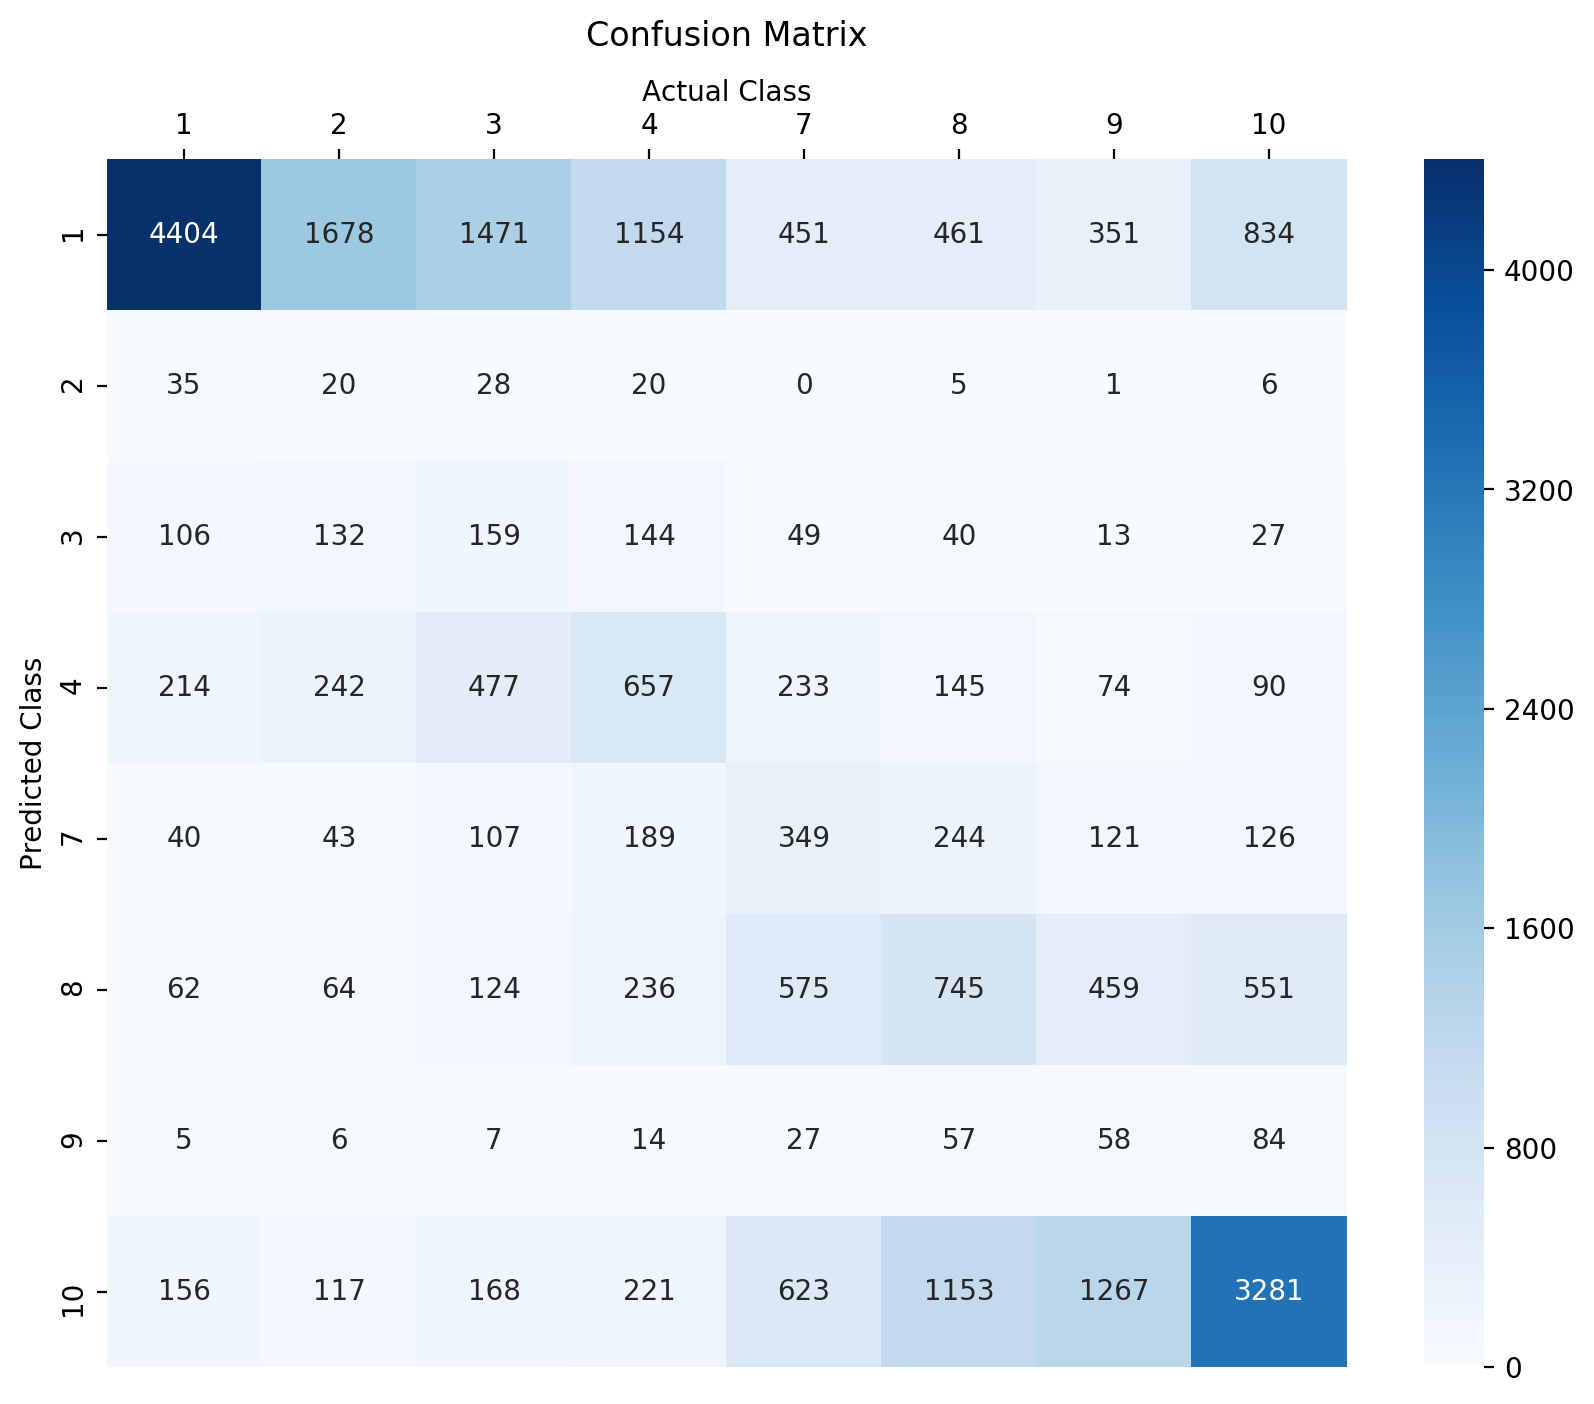

In [12]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
_ = sns.heatmap(conf_matrix,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels,fmt='g')
ax.set_xlabel("Actual Class")
ax.set_ylabel("Predicted Class")
plt.title("Confusion Matrix",y=1.08)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

In [13]:
# Evaluation
true_pos = conf_matrix.trace()
false_pos = conf_matrix.sum(axis=0)
false_neg = conf_matrix.sum(axis=1)
prec = true_pos/(true_pos+false_pos)
recall = true_pos/(true_pos+false_neg)
micro_prec = true_pos.sum()/(true_pos.sum()+false_pos.sum())
micro_recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())
macro_prec = prec.sum()/conf_matrix.shape[0]
macro_recall = recall.sum()/conf_matrix.shape[0]
micro_f1 = 2*micro_prec*micro_recall/(micro_prec+micro_recall)
macro_f1 = 2*macro_prec*macro_recall/(macro_prec+macro_recall)
print("Micro F1 score = {0:.4f}".format(micro_f1))
print("Macro F1 score = {0:.4f}".format(macro_f1))

Micro F1 score = 0.2790
Macro F1 score = 0.7819


In [14]:
# New Train Data
new_x_train = np.loadtxt('./data/imdb/new_imdb_train_text.txt',delimiter='\n',dtype='str',comments=None)

# New Test Data
new_x_test = np.loadtxt('./data/imdb/new_imdb_test_text.txt',delimiter='\n',dtype='str',comments=None)

In [15]:
# Create New Dictionary
words = []
for doc in new_x_train:
    words += set(tokenize(doc))
words = set(words)
diction = dict(zip(list(words),np.arange(len(words))))
save(diction,"./data/tmp/new_diction.pickle")
# diction = load("./data/tmp/new_diction.pickle")
print("Stemmed Dictionary created")

Stemmed Dictionary created


In [16]:
# Calculate New Word Counts per Class
labels, label_counts = np.unique(y_train,return_counts=True)
class_label_map = dict(zip(labels,np.arange(labels.shape[0])))
word_counts_per_class = np.zeros((labels.shape[0],len(diction.keys())),dtype=np.int64)
for idx, doc in enumerate(new_x_train):
    doc_words = tokenize(doc)
    unique_doc_words, word_count = np.unique(doc_words,return_counts=True)
    for idy, w in enumerate(unique_doc_words):
        word_counts_per_class[class_label_map[y_train[idx]],diction[w]] += word_count[idy]
save(word_counts_per_class,"./data/tmp/new_word_counts_per_class.pickle")
# word_counts_per_class = load("./data/tmp/new_word_counts_per_class.pickle")
print("Stemmed Word counts calculated")

Stemmed Word counts calculated


In [17]:
theta = np.divide(word_counts_per_class+1,word_counts_per_class.sum(axis=1).reshape(-1,1)+len(diction.keys()))
phi = label_counts/y_train.shape[0]
log_theta = np.log(theta)
log_phi = np.log(phi)

In [18]:
# Train Accuracy
n_nb_train_labels = np.array([predict(doc,log_theta,log_phi,diction) for doc in new_x_train])
n_nb_train_accuracy = (y_train == n_nb_train_labels).sum()/float(y_train.shape[0])
print("Stemmed Naive Bayes Train Accuracy = {0}".format(n_nb_train_accuracy))

# Test Accuracy
n_nb_test_labels = np.array([predict(doc,log_theta,log_phi,diction) for doc in new_x_test])
n_nb_test_accuracy = (y_test == n_nb_test_labels).sum()/float(y_test.shape[0])
print("Stemmed Naive Bayes Test Accuracy = {0}".format(n_nb_test_accuracy))

Stemmed Naive Bayes Train Accuracy = 0.6798
Stemmed Naive Bayes Test Accuracy = 0.38684
